In [1]:
%matplotlib inline

import os
import pickle

from skimage.feature import hog
from skimage import color, io, transform

import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

In [2]:
STANDARD_SIZE = (100, 128)
def HOG(filename):
    im = io.imread(filename)
    image = color.rgb2gray(im)
    image = transform.resize(image, STANDARD_SIZE)
    fd = hog(image, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(4, 4), visualise=False)
    return fd

In [3]:
f = "CONFIDENTIAL_BAINBRIDGE_DATA/Full Attribute Scores/psychology attributes/psychology-attributes.txt"
df = pd.read_csv(f)
img_files_w_scores = df['Filename']

In [6]:
if os.path.isfile("tmp/XHOG.p"):
    print "file found, file loaded"
    X = pickle.load(open('tmp/X.p', 'r'))
else:
    img_dir = "CONFIDENTIAL_BAINBRIDGE_DATA/10k US Adult Faces Database/Face Images/"
    X = []
    for image in img_files_w_scores:
        img = HOG(img_dir + image)
        X.append(img)
    X = np.array(X)
    pickle.dump(X, open("tmp/XHOG.p", "wb"))

In [17]:
pca = decomposition.RandomizedPCA(n_components=100)
pca.fit(X)
pickle.dump(pca, open("tmp/HOG_PCA.p", "wb"))
X2 = pca.transform(X)

In [18]:
pca.explained_variance_ratio_.sum()

0.6489596774222528

In [19]:
cols = list(df.columns.values)
cols = cols[2:]
cols = [x for x in cols if not (x.startswith('catch')) | (x.startswith('sub'))]

In [25]:
def train_test(X,y,label="none",standard_axis=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    
    clf = RidgeCV(np.logspace(-5, 10, 100))
    clf.fit(X_train, y_train)

    y_hat = clf.predict(X_test)
    MSE = mean_squared_error(y_test,y_hat)
    R2 = clf.score(X_test,y_test)

    plt.scatter(y_test,y_hat)
    plt.title(label + ", MSE=" + str(np.round(MSE,3)) + ", R^2=" + str(np.round(R2,3)))
    if standard_axis:
        plt.xlim(0, 10)
        plt.ylim(0, 10)
    plt.show()
    return label, MSE, R2, clf

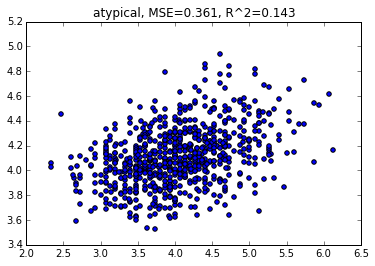

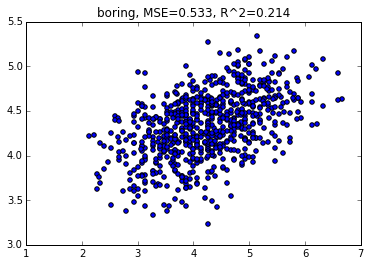

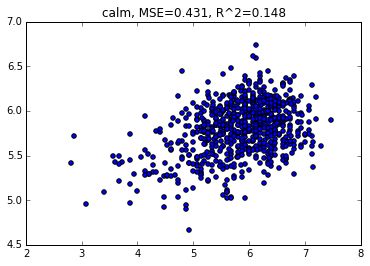

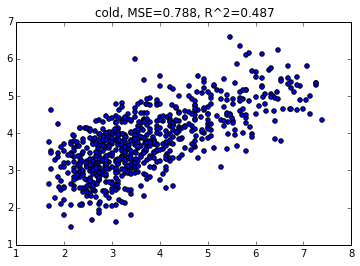

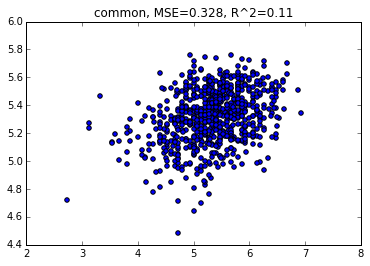

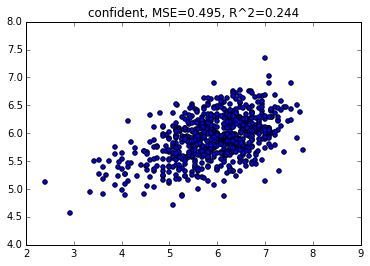

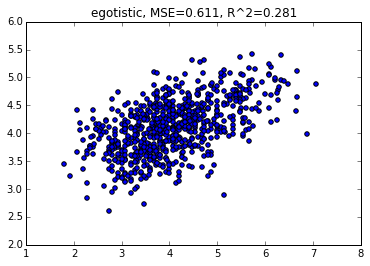

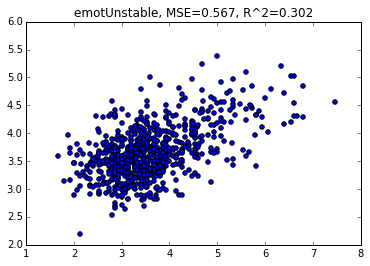

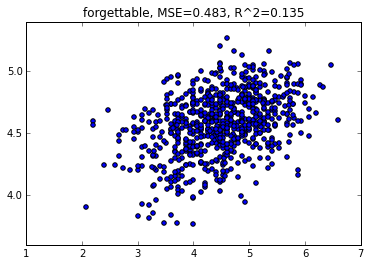

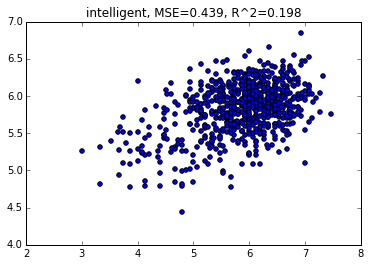

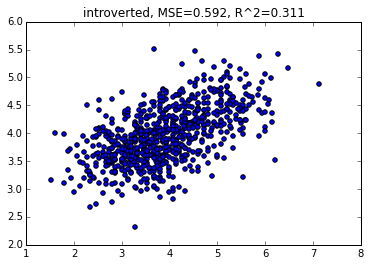

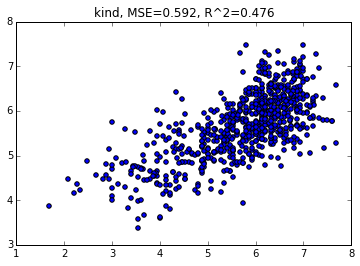

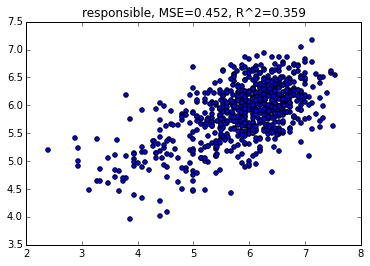

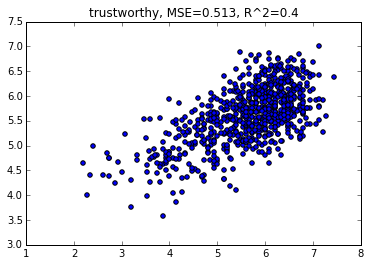

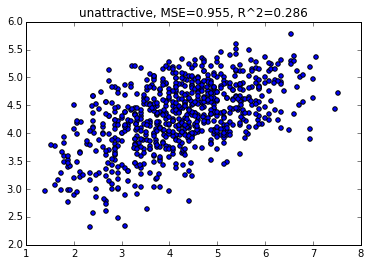

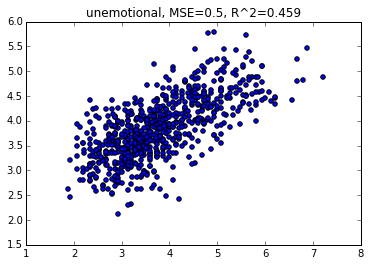

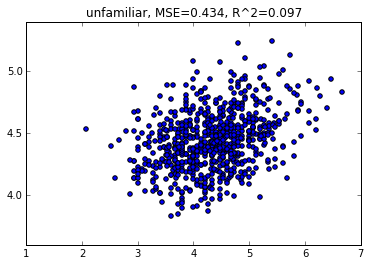

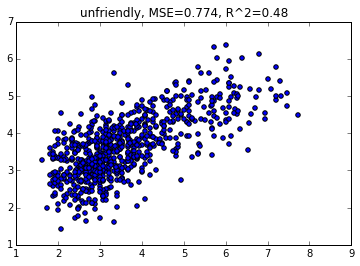

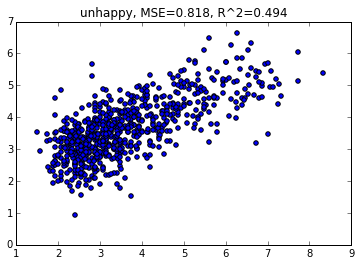

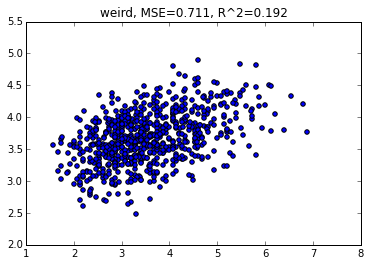

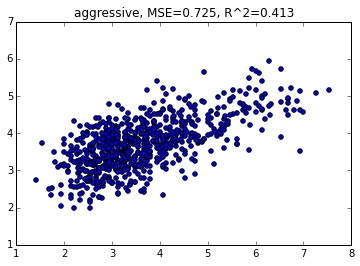

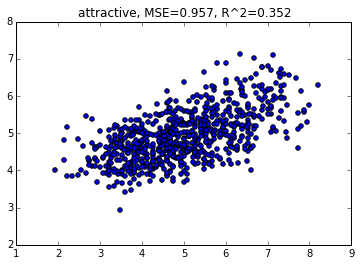

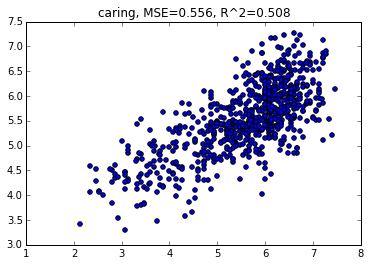

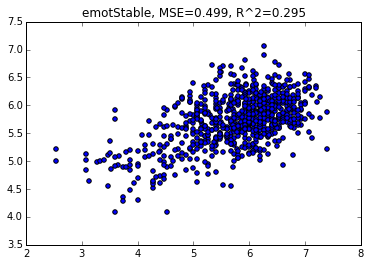

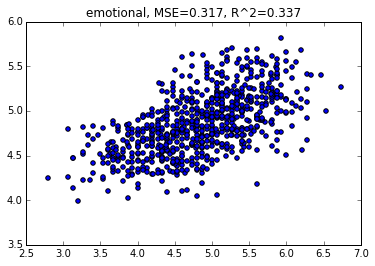

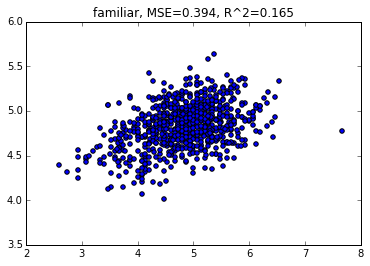

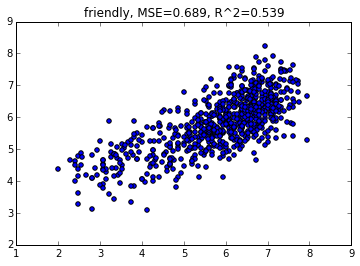

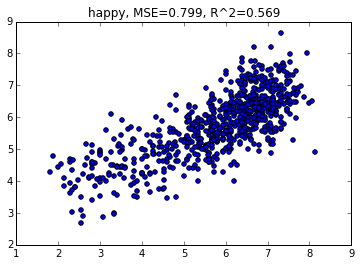

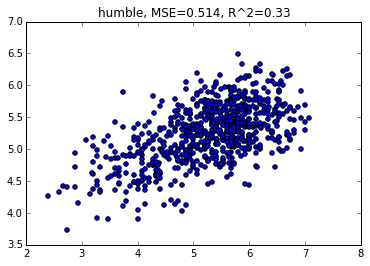

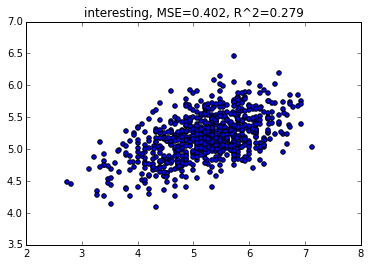

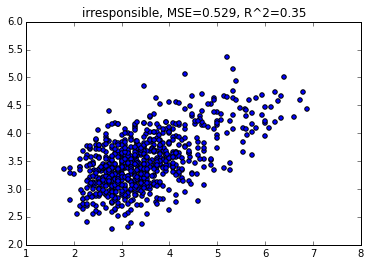

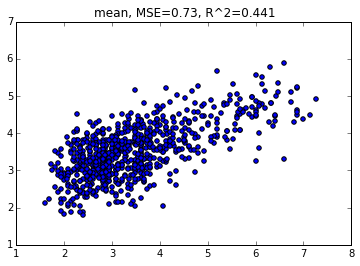

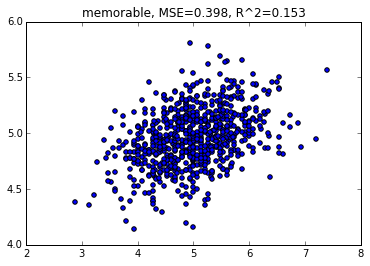

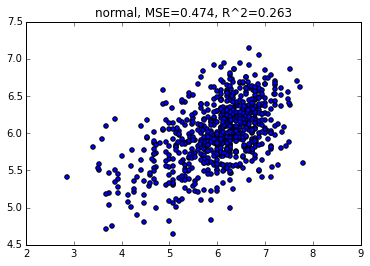

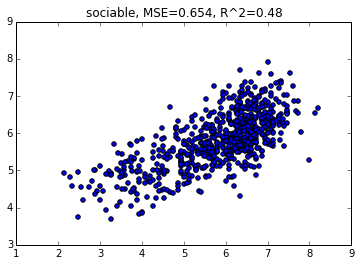

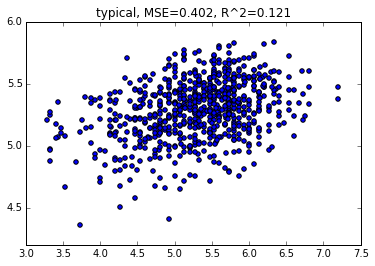

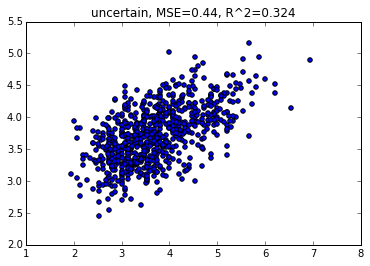

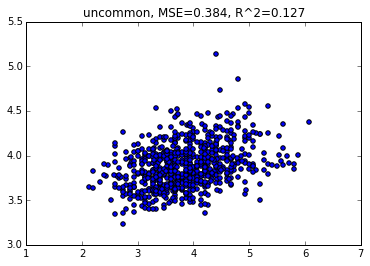

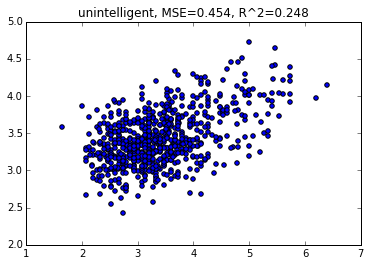

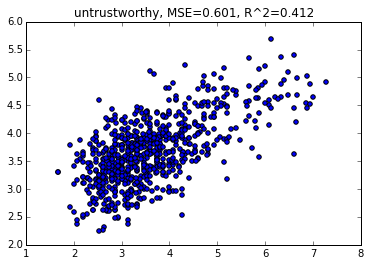

In [26]:
label_MSE_R2 = []
for col in cols:
    label_MSE_R2.append(train_test(X2,df[col].values,col))

In [27]:
clfs = {}
for label, MSE, R2, clf in label_MSE_R2:
    print label, MSE, R2
    clfs[label] = clf
pickle.dump(clfs, open("tmp/HOG_PCA_CLF.p", "wb"))

atypical 0.360943527245 0.143417341698
boring 0.533181751892 0.213824870455
calm 0.431450478131 0.148280667185
cold 0.788353796768 0.486775095563
common 0.327610879228 0.109795228583
confident 0.495027292199 0.244275992753
egotistic 0.610748188463 0.281251792038
emotUnstable 0.567023283889 0.302101768439
forgettable 0.48348657416 0.135006294161
intelligent 0.43900404685 0.198139939217
introverted 0.591952297757 0.310989055253
kind 0.592067829155 0.475886194561
responsible 0.452200739776 0.35869968902
trustworthy 0.513221724099 0.399997887289
unattractive 0.955251828285 0.286211754137
unemotional 0.500331275995 0.458577437543
unfamiliar 0.433536533437 0.0965305105642
unfriendly 0.774169290243 0.479543091205
unhappy 0.817808609824 0.494293222115
weird 0.710628968752 0.192029376232
aggressive 0.724707270049 0.41253531792
attractive 0.957106091224 0.351529082373
caring 0.556379165941 0.508226704584
emotStable 0.49938409146 0.295457886428
emotional 0.317318255081 0.336937100304
familiar 0.3